# Лабораторная работа №5. **Decision Trees Regression**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("wage.csv")

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


## Data preprocessing

In [6]:
df.isna().sum()

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [7]:
df.drop('feduc', axis=1, inplace=True)

In [8]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    935 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 73.2 KB


In [9]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

### Выбор признаков и разделение данных

In [10]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [11]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


###  DTs regression с Sklearn

### Параметры Decision Tree

| Parameter                | Default | Options                                                                                                                                                               | Description                                                                                                                                                                                                             |
|--------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| criterion                | gini    | Regression: MSE, MAE Classification: Gini impurity, Cross Entropy                                                                                                     | Metric to evaluate split quality.                                                                                                                                                                                       |
| splitter                 | best    | best, random                                                                                                                                                          | How to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.                                                                            |
| max_depth                | None    | int                                                                                                                                                                   | Max # of levels in tree. Split nodes until max_depth is reached or all leaves are pure or all leaves contain less than min_samples_split samples.                                                                       |
| max_features             | None    | None: max_features=n_features; int; float (fraction): int(max_features * n_features)  auto, sqrt: max_features=sqrt(n_features). log2: max_features=log2(n_features). | # of features to consider when evaluating split                                                                                                                                                                         |
| max_leaf_nodes           | None    | None: unlimited # of leaf nodes int                                                                                                                                   | Continue to split nodes that reduce relative impurity the most until reaching max_leaf_nodes.                                                                                                                           |
| min_impurity_decrease    | 0       | float                                                                                                                                                                 | Split node if impurity decreases by at least this value.                                                                                                                                                                |
| min_samples_leaf         | 1       | int; float (as percentage of N)                                                                                                                                       | Minimum # of samples to be at a leaf node. A split will only be considered if there are at least min_samples_leaf training samples in each of the left and right branches. May smoothen the model, esp. for regression. |
| min_samples_split        | 2       | int; float (as percentage of N)                                                                                                                                       | The minimum number of samples required to split an internal node:                                                                                                                                                       |
| min_weight_fraction_leaf | 0       | NA                                                                                                                                                                    | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided (in fit method).                       |
| class_weight             | None    | balanced: inversely proportional to class frequencies dict: {class_label: weight} list of dicts (for multi-output)                                                    | Weights associated with classes                                                                                                                                                                                         |

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Fitting regression tree to the Training set
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
# Predicting the Test set results
y_hat = Tree_regressor.predict(X_test)

In [15]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
434,975000.0,660000.0
238,1730000.0,1384000.0
531,675000.0,693000.0
157,1899000.0,635000.0
601,1500000.0,1602000.0


----

## Оценка модели¶

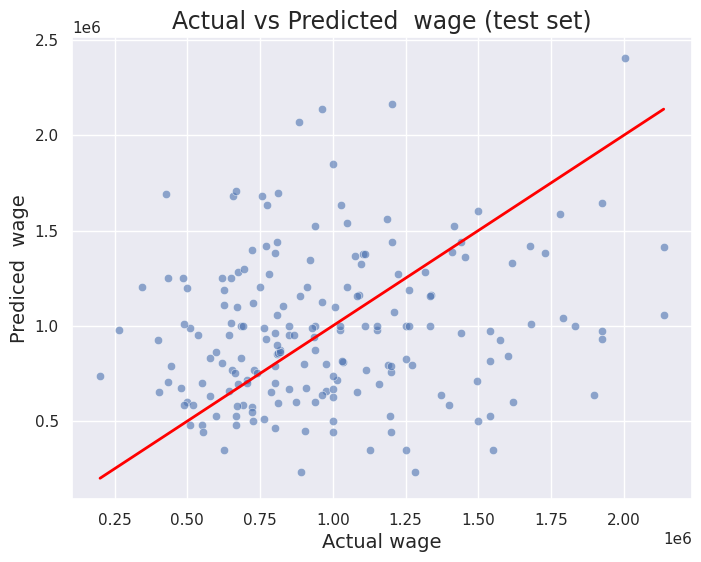

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [17]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

498011.3

---

## Обрезка дерева с использованием метода обрезки по сложности затрат.
### Выбор $\alpha$ с помощью кросс-валидации.

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

* Функция Cost_complexity_pruning_path генерирует последовательность значений-кандидатов для альфа, исследуя путь сокращения от самого большого поддерева к самому маленькому поддереву.
* Затем функция вычисляет эффективное значение альфа для каждого поддерева как разницу в сложности стоимости между родительским поддеревом и текущим поддеревом, деленную на количество листьев, удаленных на этапе обрезки. Эффективное значение альфа для самого большого поддерева установлено равным нулю.
* Функция возвращает массив эффективных значений альфа для каждого поддерева на пути сокращения, который можно использовать для выбора оптимального значения альфа для сокращения дерева решений.

In [20]:
len(ccp_alphas)

619

In [21]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [22]:
path

{'ccp_alphas': array([0.00000000e+00, 6.68449198e+02, 6.68449198e+02, 6.68449198e+02,
        2.67379679e+03, 2.67379679e+03, 2.67379679e+03, 2.67379679e+03,
        6.01604278e+03, 6.01604278e+03, 6.01604278e+03, 1.06951872e+04,
        1.06951872e+04, 1.06951872e+04, 1.06951872e+04, 1.06951872e+04,
        1.67112299e+04, 1.67112299e+04, 2.40641711e+04, 2.40641711e+04,
        2.40641711e+04, 4.27807487e+04, 4.27807487e+04, 5.41443850e+04,
        5.41443850e+04, 5.70409982e+04, 6.68449198e+04, 6.68449198e+04,
        6.68449198e+04, 8.08823529e+04, 8.08823529e+04, 8.08823529e+04,
        8.08823529e+04, 9.62566845e+04, 9.62566845e+04, 9.62566845e+04,
        1.12967914e+05, 1.12967914e+05, 1.31016043e+05, 1.31016043e+05,
        1.31016043e+05, 1.50401070e+05, 1.50401070e+05, 1.50623886e+05,
        1.62433155e+05, 1.71122995e+05, 1.71122995e+05, 1.93181818e+05,
        1.93181818e+05, 2.00534759e+05, 2.00534759e+05, 2.00534759e+05,
        2.16577540e+05, 2.16577540e+05, 2.16577540

In [23]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000,548544.149867
1,668.449198,548544.149867
2,668.449198,548544.149867
3,668.449198,548544.149867
4,2673.796791,548544.580352


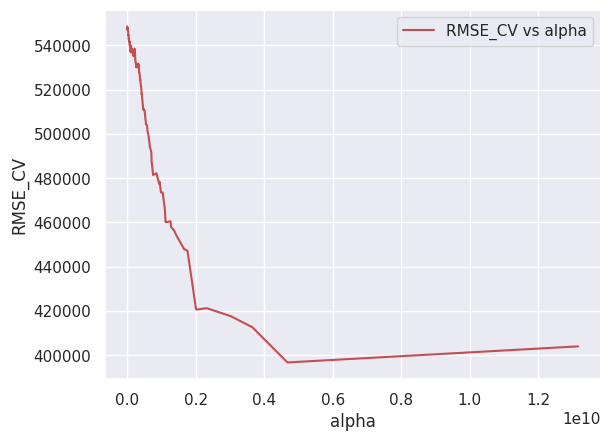

In [24]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [25]:
np.argmin(output['RMSE_CV'])

616

In [26]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      4.678526e+09
RMSE_CV    3.967243e+05
Name: 616, dtype: float64

In [27]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

4678525791.427368

Refit DTs regressor с оптимальным значением alpha!

In [28]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [29]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

399606.99

In [30]:
optimal_DT.get_params()

{'ccp_alpha': 4678525791.427368,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Визуализация Tree

In [31]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

In [32]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
wage_hat = dtree.predict(X_test)

In [33]:
from sklearn import tree

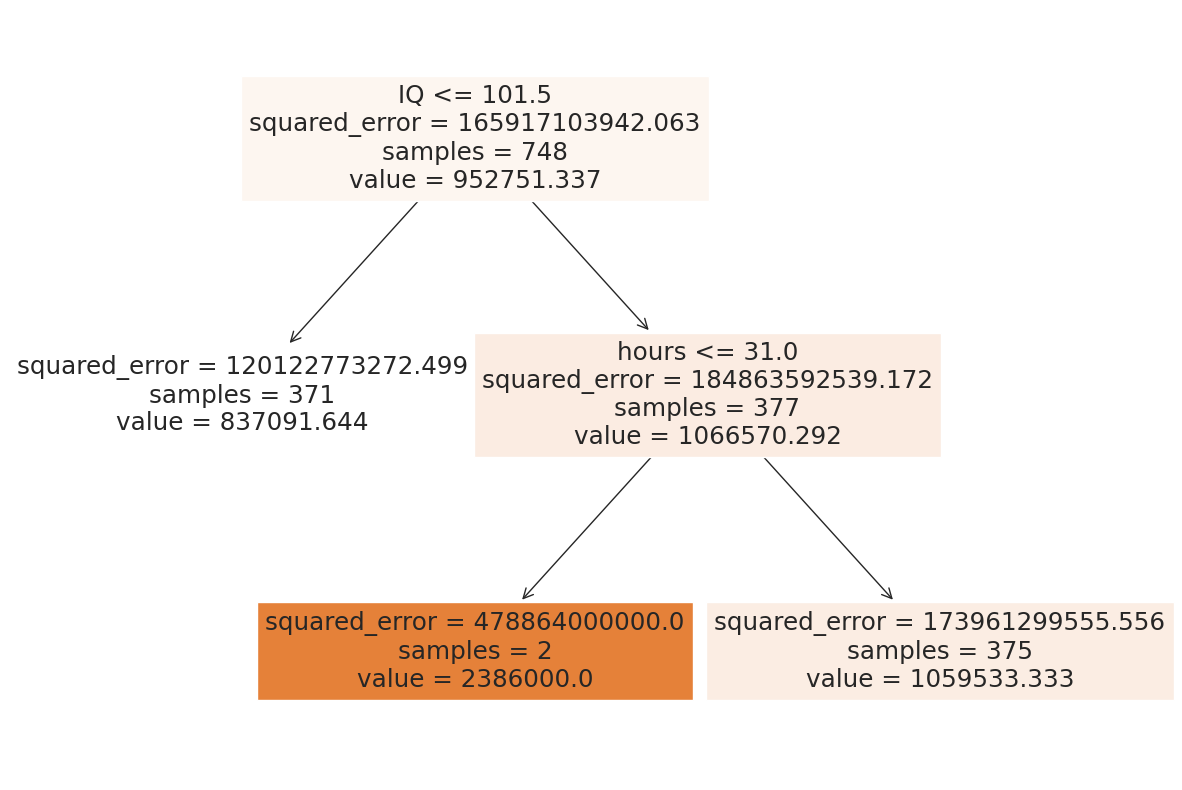

In [34]:
fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

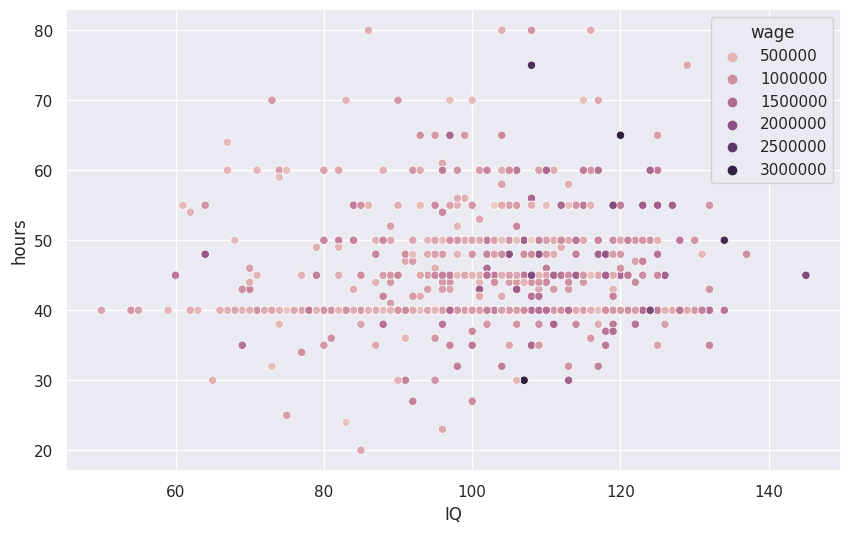

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IQ', y='hours', data=df, hue='wage')
plt.show()

In [36]:
fig.savefig("DT_plot_Regression.png")

### Визуализация регрессии



In [37]:
dtree= DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train[['IQ']], y_train)
wage_hat = dtree.predict(X_test[['IQ']])

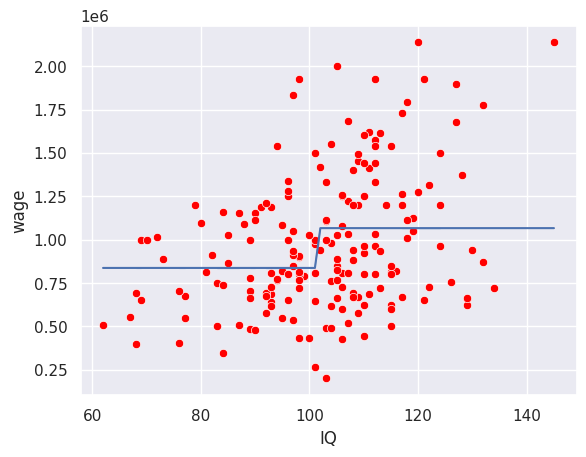

In [38]:
# визуализации линии регрессии
sns.scatterplot(x=X_test['IQ'], y=y_test, color='red')
sns.lineplot(x=X_test['IQ'], y=wage_hat)
plt.show()

In [39]:
dtree.score(np.array(X_test['IQ']).reshape(-1,1),y_test)

0.07393374074539105

Дополнительно! ---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [40]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.2 MB/s 

In [41]:
from pycaret.utils import version
version()

'3.1.0'

In [42]:
df = pd.read_csv("wage.csv")

In [43]:
df_py = df.copy()

In [44]:
df_py.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [46]:
from pycaret.regression import *


In [47]:
setup(data=df_py,  target='wage', session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,wage
2,Target type,Regression
3,Original data shape,"(935, 11)"
4,Transformed data shape,"(935, 11)"
5,Transformed train set shape,"(654, 11)"
6,Transformed test set shape,"(281, 11)"
7,Numeric features,10
8,Rows with missing values,22.8%
9,Preprocess,True


In [48]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [49]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,361424.2424,246850303030.3030,496840.3194,-0.7638,0.5290,0.4917
1,383954.5455,265809833333.3334,515567.4867,-0.5064,0.4961,0.4125
2,446787.8788,307380848484.8485,554419.3796,-1.2802,0.5812,0.4987
3,368984.8485,247100287878.7878,497091.8304,-0.2128,0.5072,0.4281
4,537523.0769,531408353846.1539,728977.6086,-0.7920,0.6155,0.6571
5,369692.3077,276344246153.8462,525684.5500,-0.3655,0.4841,0.4079
6,371984.6154,262388569230.7692,512238.7815,-0.9103,0.5075,0.4559
7,368953.8462,245123723076.9230,495099.7102,-1.1426,0.4742,0.4478
8,400461.5385,249392676923.0770,499392.3076,-1.0871,0.5469,0.4941


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,294684.3458,142706411798.1341,377765.0219,-0.0197,0.4370,0.4227
1,273191.0898,158510597592.7326,398133.8941,0.1017,0.3604,0.2974
2,262935.9373,124434877834.3058,352753.2818,0.0769,0.3864,0.3300
3,278032.7111,147426715515.1130,383961.8673,0.2764,0.3738,0.3442
4,340618.3265,262822526396.3297,512662.1952,0.1137,0.4706,0.4226
5,297456.7690,179362788413.4950,423512.4419,0.1137,0.3740,0.3196
6,309439.6710,139393967106.7890,373355.0148,-0.0149,0.4188,0.3853
7,272106.4932,113928803362.8648,337533.4107,0.0042,0.3752,0.3628
8,262946.3561,115195038216.8821,339403.9455,0.0360,0.4031,0.3443


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


###  Дополнительные ссылки:


1. Decision Trees с sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Decision Trees visualization: https://mljar.com/blog/visualize-decision-tree/
